In [1]:
import Ipynb_importer
import matplotlib.pyplot as plt
import MUSIC
import numpy as np
from scipy import signal

importing Jupyter notebook from MUSIC.ipynb


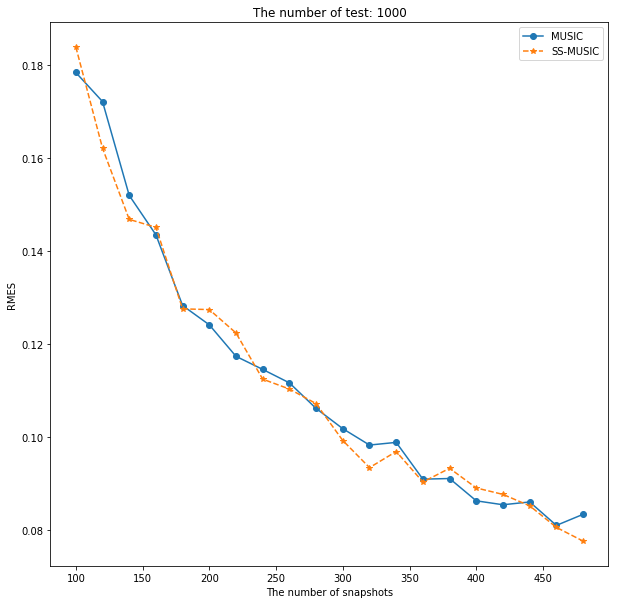

In [3]:
theta_S = np.array([-10, 0, 10])
sensorNum = 8
SNR = 20

N = 1000

STD_RMES_list = []
SS_RMES_list = []
snapshotsVals = range(100, 500, 20)
for snapshots in snapshotsVals:
    RMES = 0
    
    for itr in range(N):
        theta, P_mu = MUSIC.STD_MUSIC(SNR, snapshots, sensorNum)
        peakIdx = signal.argrelmax(abs(P_mu))[0]
        peakVals = abs(P_mu[peakIdx])
        idx = np.argsort(-peakVals)
        peakIdx = peakIdx[idx[: len(theta_S)]]
        theta_h = theta[peakIdx]    # theta hat            
        theta_h.sort()
        
        res = theta_S - theta_h
        RMES = RMES + np.sqrt(np.dot(res.T, res)/len(theta_S))
        
    RMES = RMES/N
    STD_RMES_list.append(RMES)
    
    RMES = 0
    
    for itr in range(N):
        theta, P_mu = MUSIC.SS_MUSIC(SNR, snapshots, sensorNum)
        peakIdx = signal.argrelmax(abs(P_mu))[0]
        peakVals = abs(P_mu[peakIdx])
        idx = np.argsort(-peakVals)
        peakIdx = peakIdx[idx[: len(theta_S)]]
        theta_h = theta[peakIdx]    # theta hat            
        theta_h.sort()
        
        res = theta_S - theta_h
        RMES = RMES + np.sqrt(np.dot(res.T, res)/len(theta_S))
        
    RMES = RMES/N
    SS_RMES_list.append(RMES)

STD_RMES_list = np.array(STD_RMES_list)
SS_RMES_list = np.array(SS_RMES_list)

fig = plt.figure(0)
plt.plot(snapshotsVals, STD_RMES_list, label='MUSIC', marker='o', linestyle='-')
plt.hold
plt.plot(snapshotsVals, SS_RMES_list, label='SS-MUSIC', marker='*', linestyle='--')
plt.legend()
plt.xlabel('The number of snapshots')
plt.ylabel('RMES')
plt.title('The number of test: ' + str(N))
fig.set_size_inches(10, 10)
plt.show()
fig.savefig('Two mathods in different snapshots')